# Let's see if the visual features extracted from `visual-features-extraction.ipynb` are okay

Select a video from the training datset randomly

In [1]:
VISUAL_FEATURES_PATH = '/home/tk/datasets/MELD/visual-features/entire-dataset/train/'
VIDS_DIR = "/home/tk/datasets/MELD/MELD.Raw/train/train_splits/"

from glob import glob
import random

features_path_ = glob(os.path.join(VISUAL_FEATURES_PATH, '*.npy'))

features_path = random.choice(features_path_)

vid_path = os.path.join(VIDS_DIR, os.path.basename(features_path)).replace('.npy', '.mp4')

assert os.path.isfile(vid_path)

import json

DATASET_PATH = '/home/tk/datasets/MELD/visual-features/entire-dataset/datasets.json'

with open(DATASET_PATH, 'r') as stream:
    dataset = json.load(stream)

annot = dataset['train'][os.path.basename(features_path).split('.npy')[0]]

Select a frame randomly and annotate it with the visual features.

/home/tk/datasets/MELD/MELD.Raw/train/train_splits/dia389_utt4.mp4


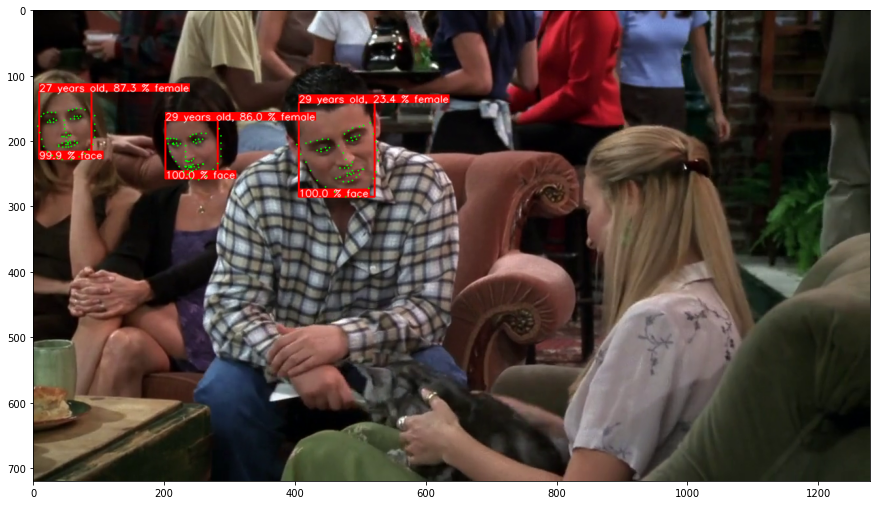

SrNo 	 3855
Utterance 	 Yeah?
Speaker 	 Phoebe
Emotion 	 surprise
Sentiment 	 positive
Dialogue_ID 	 389
Utterance_ID 	 4
Season 	 4
Episode 	 2
StartTime 	 00:12:05,224
EndTime 	 00:12:06,224


In [2]:
import numpy as np
import av

features = np.load(features_path, allow_pickle=True)
# below line is necessary since the saved file is actually a dictionary.
features = features.item()

container = av.open(vid_path)

print(vid_path)

frames = {}
for frame in container.decode(video=0):
    idx = frame.index
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

assert np.abs(len(frames) - len(features)) <= 1

import matplotlib.pyplot as plt
import cv2

def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)

idx = random.choice(list(frames.keys()))
img = frames[idx]

feature = features[idx]

for feat in feature:
    bbox = feat['bbox']
    landmark = feat['landmark']
    age = feat['age']
    gender = feat['gender']
    embedding = feat['embedding']
    # face = feat['face']

    x1, y1, x2, y2, prob = bbox
    
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    label = f"{str(round(prob*100, 1))} % face"
    draw_label(img, (x1, y2), label, font_scale=0.5, thickness=1)

    for lm in landmark:
        cv2.circle(img, (int(lm[0]), int(lm[1])), 1, (0,255,0), -1)

    label = f"{int(age)} years old, {str(round(gender*100, 1))} % female"
    draw_label(img, (x1, y1), label, font_scale=0.5, thickness=1)
    
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

for key, val in annot.items():
    print(key, '\t', val)